# pydscatter

pydscatter is a Python implementation of the dscatter algorithm by [Paul Eilers and Jelle Goeman](https://academic.oup.com/bioinformatics/article/20/5/623/213453). It is a fast algorithm that generates scatter plots colored by density of the points, which helps visualizing large data sets. This lightweight implementation requires only numpy and matplotlib for plotting. Supported are simple scatter plots, contour plots, and images rendered from the density information only.

## Installation

Copy the `pydscatter.py` file into the folder that contains your python script, and import the functions of choice (see below).

## Examples

Generate an example data set with a large number of points:

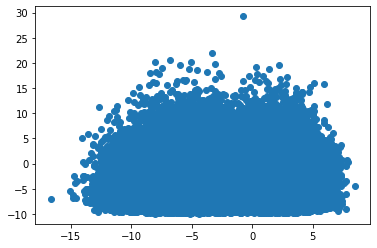

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.hstack((np.random.normal(-5, 2.5, 100000), np.random.normal(2, 1.5, 100000)))
Y = np.hstack((np.random.gamma(3, 2, 150000)-10, np.random.normal(0, 2, 50000)))

plt.scatter(X, Y)
plt.show()

This is not a very useful visualization of the data. We know, from the code above, that there are multiple convoluted distributions within this cloud.

### I. Scatter Plot with density coloring

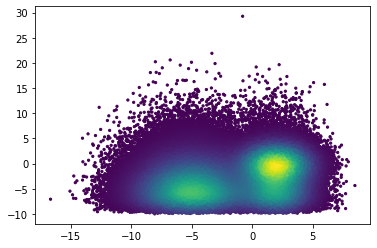

In [2]:
from pydscatter import dscatter_plot

# default parameters
dscatter_plot(X, Y, nbins=[], lamb=20, markersize=5, ax=None)
plt.show()

The smoothness parameter $\lambda$ (lower=smoother) and the number of bins in x or y direction can be tuned.

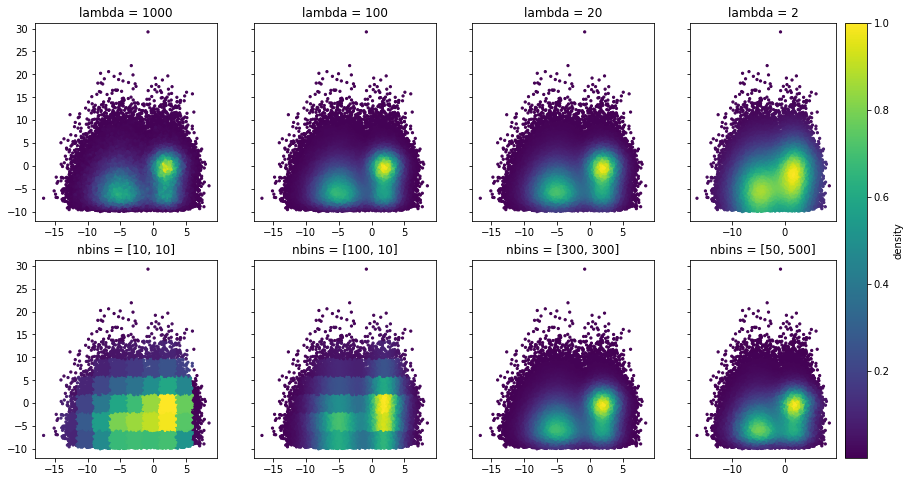

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(15,8), sharey=True)

# varying lambda
lamb = [1000, 100, 20, 2]
for i, ax in enumerate(axs.flatten()[:4]):
    # axis to plot on can be passed to the function
    dscatter_plot(X, Y, lamb=lamb[i], ax=ax)
    ax.set_title('lambda = %i'%(lamb[i]))

# varying number of bins
nbins = [[10, 10], [100, 10], [300, 300], [50, 500]]
for i, ax in enumerate(axs.flatten()[4:]):
    # axis to plot on can be passed to the function
    p = dscatter_plot(X, Y, nbins=nbins[i], ax=ax)
    ax.set_title('nbins = [%i, %i]'%(nbins[i][0], nbins[i][1]))
# add a colorbar
fig.colorbar(p, ax=axs[:,3], label='density')
plt.show()

### II. Contour Plot with density coloring

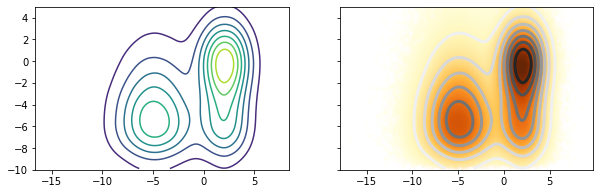

In [4]:
from pydscatter import dscatter_contour

fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)
dscatter_contour(X, Y, ax=axs[0])

# scatter and contour plot can be combined, standard matplotlib keyword arguments can be passed
dscatter_plot(X, Y, ax=axs[1], cmap='YlOrBr', markersize=10, alpha=0.1)
dscatter_contour(X, Y, ax=axs[1], cmap='Greys', linewidths=3)

plt.setp(axs, ylim=[-10, 5])
plt.show()

### III. Image colored by density

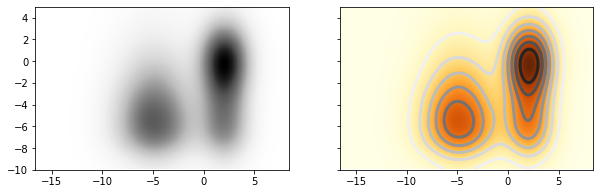

In [5]:
from pydscatter import dscatter_img

fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)
dscatter_img(X, Y, ax=axs[0], cmap='Greys')

# image and contour plot can be combined
dscatter_img(X, Y, ax=axs[1], cmap='YlOrBr')
dscatter_contour(X, Y, ax=axs[1], cmap='Greys', linewidths=3)

plt.setp(axs, ylim=[-10, 5])
plt.show()

### Additional Applications

For additional applications the colormap, density matrix, and contours can be retrieved from the main function. For example, if the density values should be calculated in logarithmic space.

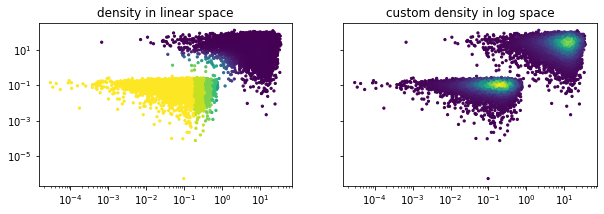

In [6]:
# sample data spanning orders of magnitude:
X_log = abs(np.hstack((np.random.normal(0.1, 0.2, 10000), np.random.normal(10, 7, 10000))))
Y_log = abs(np.hstack((np.random.normal(0.1, 0.05, 10000), np.random.normal(10, 30, 10000))))

# import pydscatter function, which returns an array corresponding to densities
from pydscatter import pydscatter

# get densities in log10 space
col, F, ctrs1, ctrs2 = pydscatter(np.log10(X_log), np.log10(Y_log), lamb=50)

# plot
fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)
# standard densities
dscatter_plot(X_log, Y_log, ax=axs[0])
axs[0].set_title('density in linear space')
# log densities
axs[1].scatter(X_log, Y_log, 5, col)
axs[1].set_title('custom density in log space')

plt.setp(axs, yscale='log', xscale='log')
plt.show()